# TrackML Particle Tracking Challenge - Visualization Notebook

https://www.kaggle.com/c/trackml-particle-identification

A [python library](https://github.com/LAL/trackml-library) is available to simplify the data handling.

In [1]:
from trackml.dataset import load_event

---

In [388]:
import numpy as np
from bokeh import palettes
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path = !pwd

We will be exploring the first event in the training sample database.

In [401]:
event = 1000
hits, cells, particles, truth = load_event(path[0]+'/train_100_events/event'+str(event).zfill(9))

## 1. Checking out each dataframe

## 1.1 Hits

Here we have the  x, y, z  global coordinates (in millimeters) of where the particles hit the detector surface.

In [402]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [403]:
volumes = hits.volume_id.unique()
colors = palettes.viridis(len(volumes))

#### Frontal Hits (x, z)

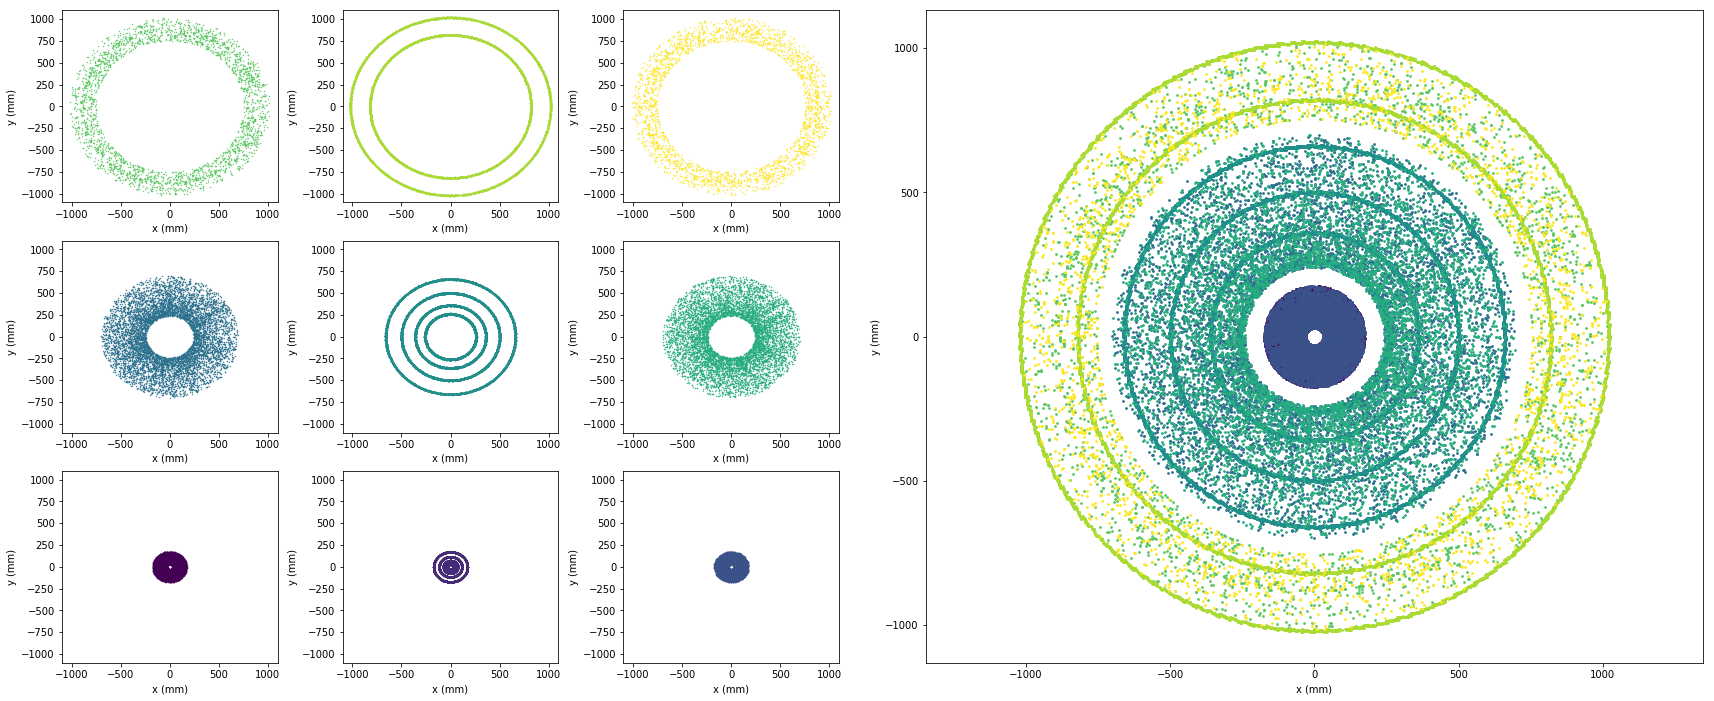

In [404]:
plt.figure(figsize=(24,12))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.5, wspace=0.3)
index=0
for i in range(1,4):
    for j in range(3):
        v = hits[hits.volume_id==volumes[index]]
        ax = plt.subplot(gs1[-i,j])
        plt.scatter(v.x, v.y, s=.2, c=colors[index])
        plt.xlabel('x (mm)')
        plt.ylabel('y (mm)')
        ax.set_ylim(-1100,1100)
        ax.set_xlim(-1100,1100)
        index+=1
gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.55, right=1)
ax = plt.subplot(gs2[0,0])
index=0
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='Volume {}'.format(volume), c=colors[index])
    index+=1
plt.axis('equal')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

#### Side Hits (z, y)

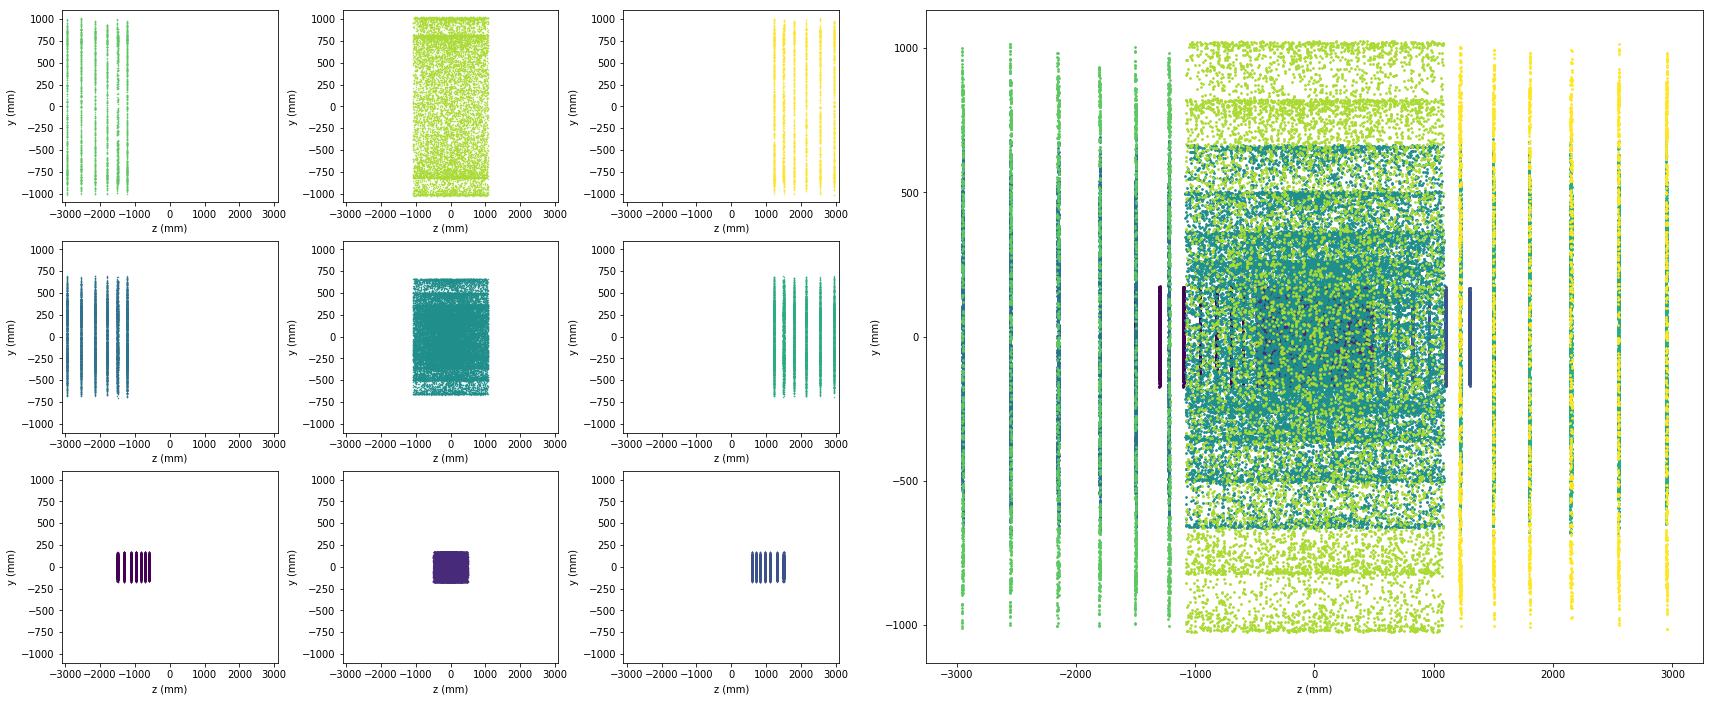

In [405]:
plt.figure(figsize=(24,12))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.5, wspace=0.3)
index=0
for i in range(1,4):
    for j in range(3):
        v = hits[hits.volume_id==volumes[index]]
        ax = plt.subplot(gs1[-i,j])
        plt.scatter(v.z, v.y, s=.2, c=colors[index])
        plt.xlabel('z (mm)')
        plt.ylabel('y (mm)')
        ax.set_ylim(-1100,1100)
        ax.set_xlim(-3100,3100)
        index+=1
gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.55, right=1)
ax = plt.subplot(gs2[0,0])
index=0
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='Volume {}'.format(volume), c=colors[index])
    index+=1
plt.xlabel('z (mm)')
plt.ylabel('y (mm)')
plt.show()

#### 3D plot

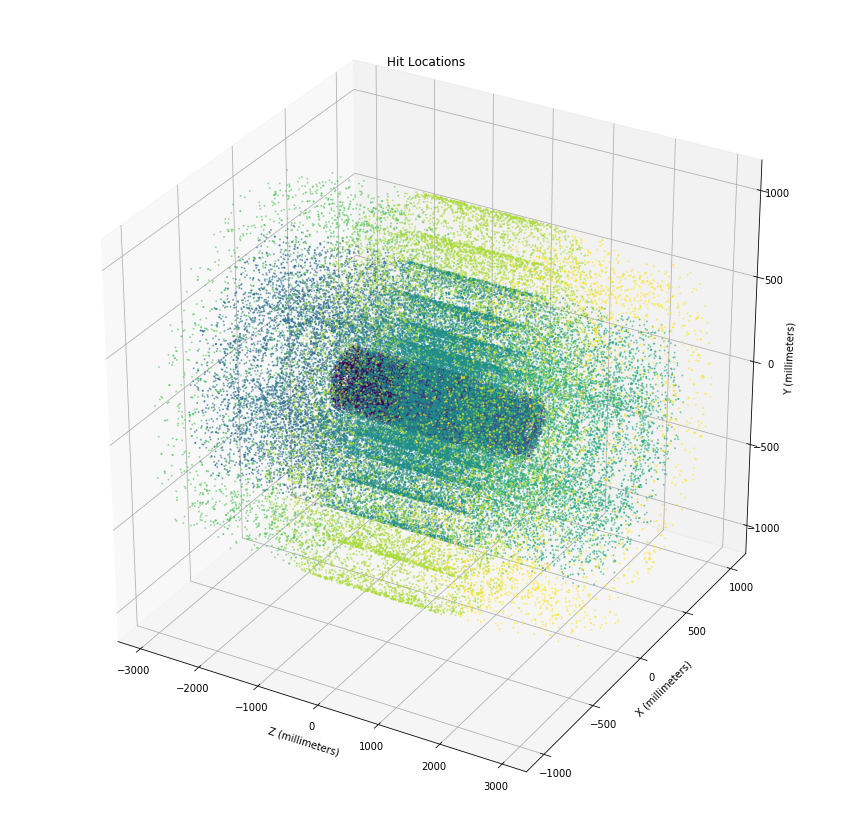

In [406]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
index=0
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5, c=colors[index])
    index+=1
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()

## 1.2 Particles

In [396]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1,11
1,4503874505277440,0.000345,-0.014204,0.031768,-0.428287,0.199979,1.107490,-1,4
2,4503943224754176,0.000345,-0.014204,0.031768,1.145020,-1.357130,6.140760,1,2
3,4504011944230912,0.000345,-0.014204,0.031768,-0.028298,-0.658477,6.179810,-1,14
4,4504080663707648,0.000345,-0.014204,0.031768,2.038530,0.556270,11.515000,1,14


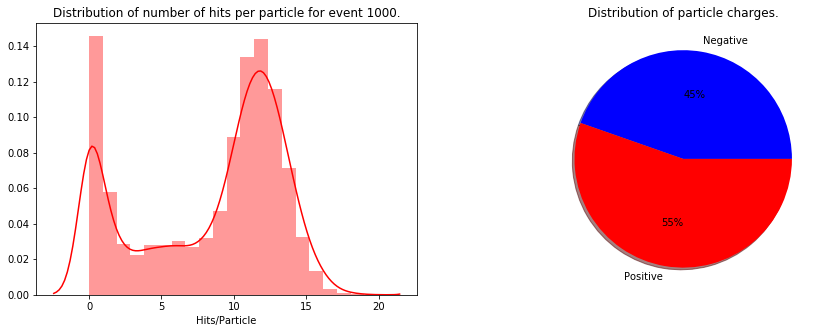

In [423]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(particles.nhits, axlabel='Hits/Particle', bins=20, color='r')
plt.title(f'Distribution of number of hits per particle for event {event}.')
plt.subplot(1, 2, 2)
plt.pie(particles.groupby('q')['vx'].count(),
        labels=['Negative', 'Positive'],
        autopct='%.0f%%',
        colors=['b','r'],
        shadow=True,
        radius=1)
plt.title('Distribution of particle charges.')
plt.show()